In [1]:
import os
import torch
import torch.nn.functional as F
import torch.optim as optim
import argparse
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

In [2]:

class Net(torch.nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = torch.nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = torch.nn.Conv2d(64, 128, kernel_size=3)
        self.conv4 = torch.nn.Conv2d(128, 256, kernel_size=3)
        self.fc1 = torch.nn.Linear(4096, 50)
        self.fc2 = torch.nn.Linear(50, 10)

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))                  # 28>26    | 1>3     | 1>1 
        x = torch.nn.functional.relu(torch.nn.functional.max_pool2d(self.conv2(x),2))  # 26>24>12 | 3>5>6   | 1>1>2
        x = torch.nn.functional.relu(self.conv3(x))                  # 12>10    | 6>10    | 2>2
        x = torch.nn.functional.relu(torch.nn.functional.max_pool2d(self.conv4(x),2))  # 10>8>4   | 10>14>16| 2>2>4
        x = x.view(-1, 4096)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.nn.functional.log_softmax(x, dim=1)


In [3]:
# trained model 
checkpoint = torch.load('model_checkpoint.pth')

/tmp/ipykernel_122665/243580994.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('model_checkpoint.pth')


In [4]:
model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4096, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [5]:
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [6]:
# TODO: Load the MNIST dataset for training and testing
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
dataset1 = datasets.MNIST('./data', train=True, download=True,transform=transform)
dataset2 = datasets.MNIST('./data', train=False,transform=transform)


In [7]:
from matplotlib import pyplot as plt

In [8]:
image, actual_value = dataset1[2]

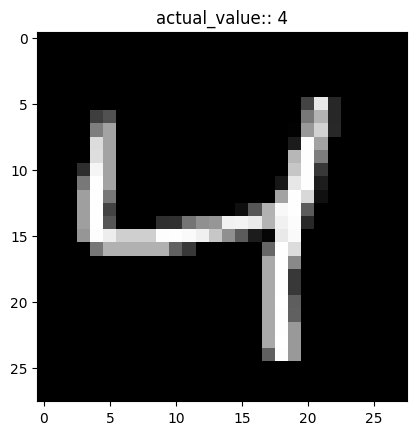

In [9]:
plt.imshow(image.permute(1,2,0),cmap='grey')
plt.title(f"actual_value:: {actual_value}")
plt.show()

In [10]:
image.shape

torch.Size([1, 28, 28])

In [11]:
image.unsqueeze(1).shape

torch.Size([1, 1, 28, 28])

In [12]:
# model returns logits
logits = model(image.unsqueeze(1))

In [18]:
logits

tensor([[-1.6904e+01, -9.7033e+00, -1.0154e+01, -1.4584e+01, -2.2409e-04,
         -1.1815e+01, -1.2553e+01, -9.2522e+00, -1.2503e+01, -1.1248e+01]],
       grad_fn=<LogSoftmaxBackward0>)

In [13]:
# doing softmax (tells which logits is greater)
logits2 =  torch.softmax(logits,dim=-1)

In [16]:
# position of maximum logits  # predicted
position_of_class = logits2.argmax(dim=-1)

In [19]:
position_of_class

tensor([4])

In [20]:
dataset1.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [17]:
dataset1.classes[position_of_class] #model prediction

'4 - four'